In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invweibull
from scipy.stats import dweibull
import scipy.stats as stats

In [2]:
%matplotlib notebook

In [3]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

<IPython.core.display.Javascript object>


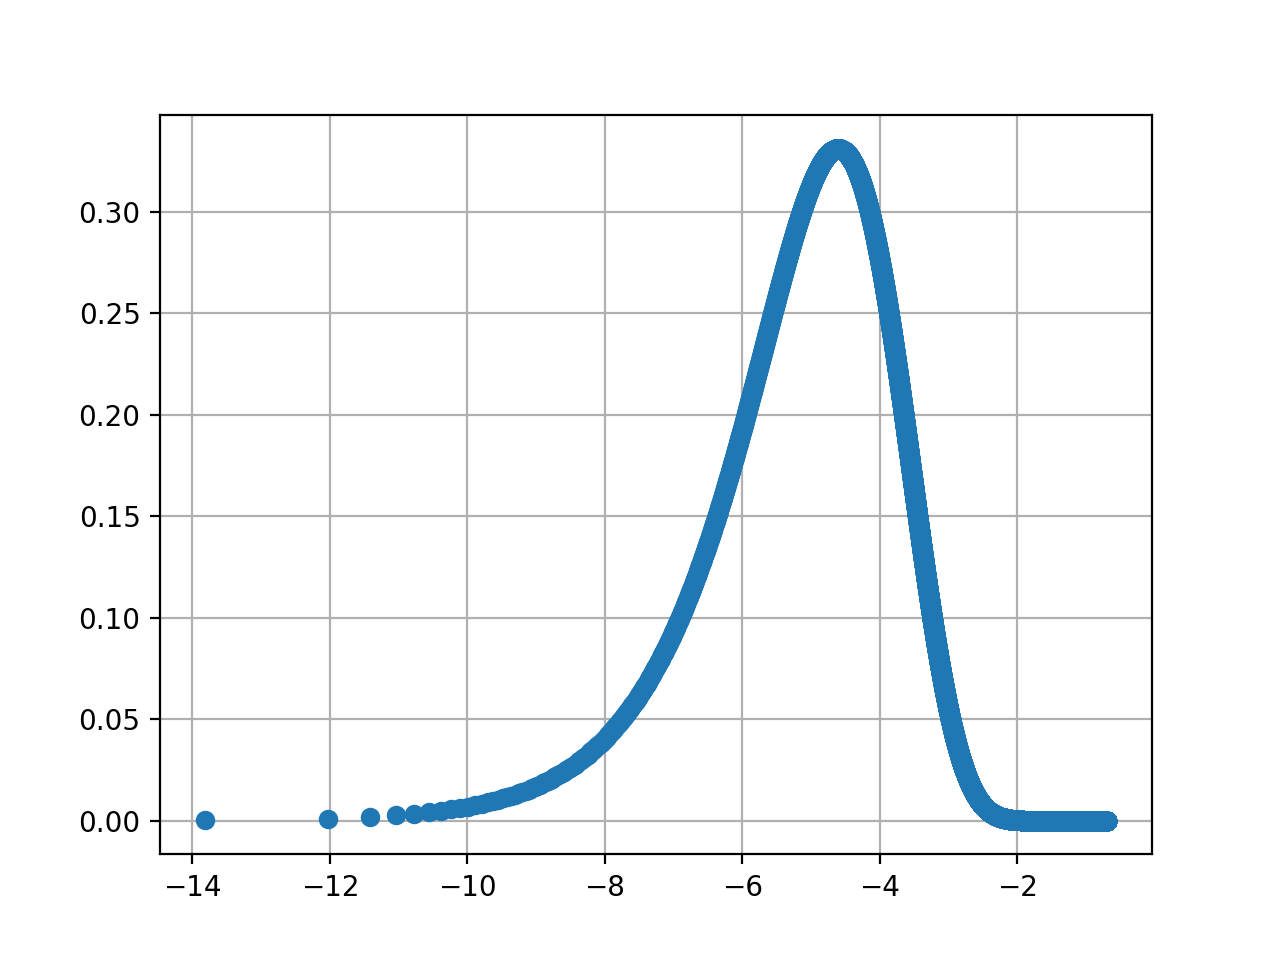

1.00000413882


In [4]:
# Generate a trial function
sigmaW = 0.1
sigma2W = sigmaW**2
etaW = 0.9
Z2max = .5
Z2 = np.linspace(0.000001,Z2max,100000)
y = np.log(Z2)
myWeibull = Weibull(Z2,sigma2W,etaW)
new_rho = myWeibull*Z2
plt.figure()
plt.plot(y,new_rho,'o')
plt.grid(True)
integral_rho = np.trapz(new_rho, y)
print(integral_rho)

In [143]:
# # Fit myWeibull(Z2) to obtain the best-fit sigmaW and etaW ...
# params = stats.exponweib.fit(Z2, floc=0, f0=1)
# shape = params[1]
# scale = params[3]
# print(shape)
# print(scale)
# values,bins,hist = plt.hist(Z2,bins=51,range=(0,25),normed=True)
# center = (bins[:-1] + bins[1:]) / 2.
# plt.plot(center,stats.exponweib.pdf(center,*params))



<IPython.core.display.Javascript object>


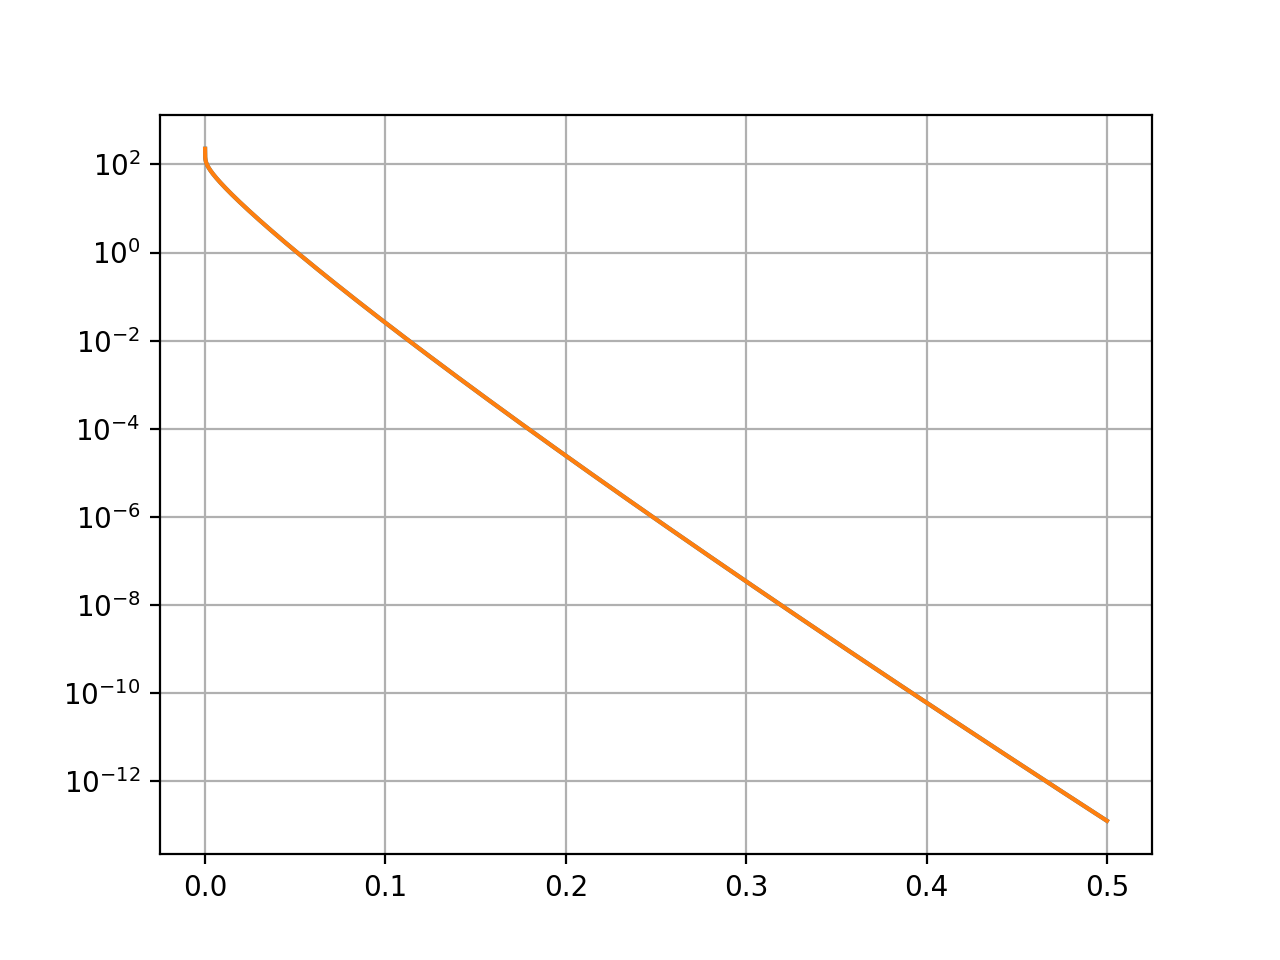

In [5]:
plt.figure()
plt.semilogy(Z2, myWeibull)
plt.semilogy(Z2, stats.exponweib.pdf((Z2/sigma2W), 1, etaW)/sigma2W)
plt.grid(True)

<IPython.core.display.Javascript object>


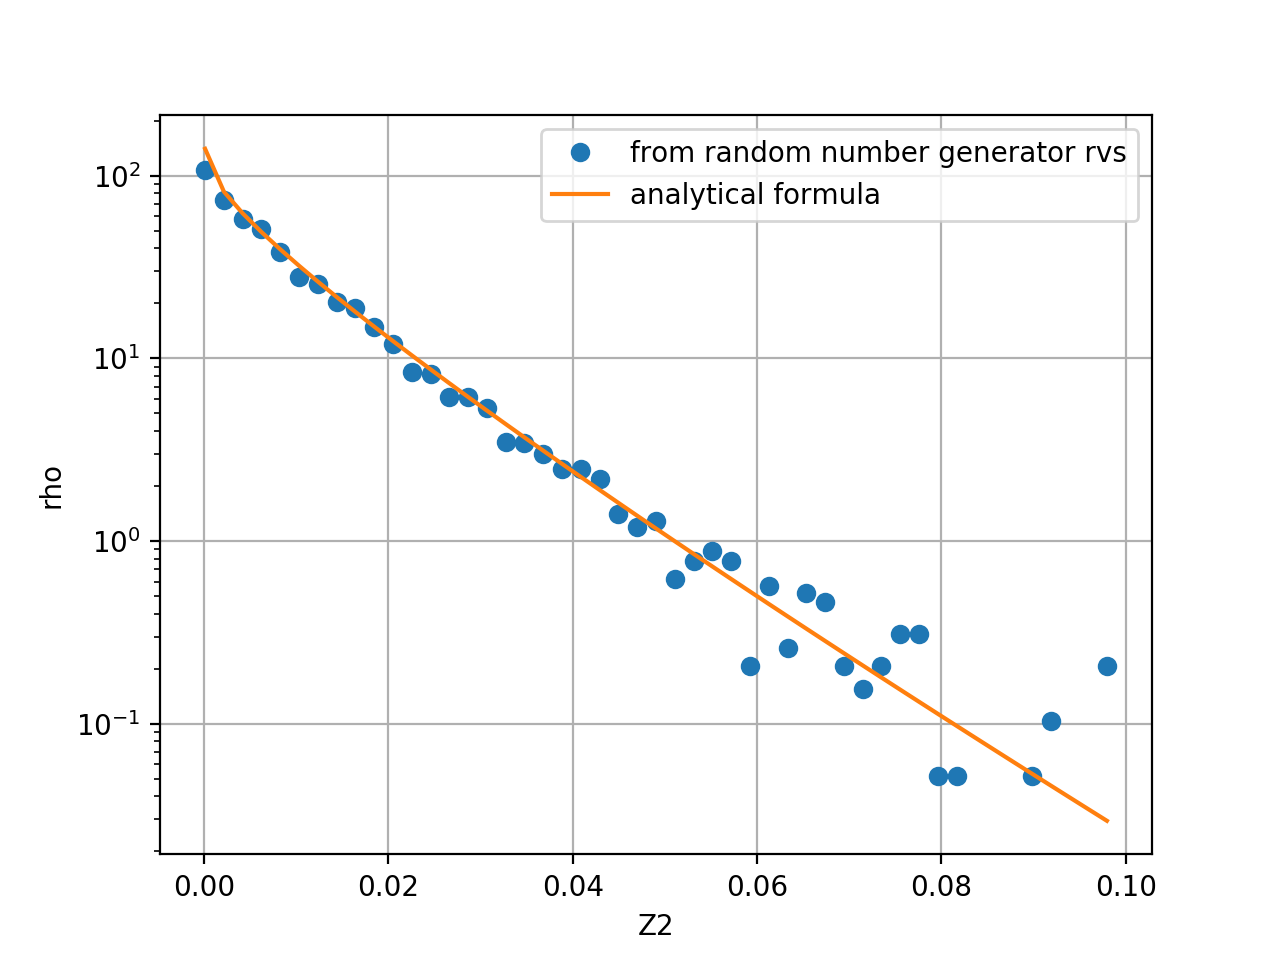

Text(0,0.5,'rho')

In [8]:
x_rand = stats.exponweib.rvs(1, etaW, size=10000)*sigma2W
bins = np.linspace(0.0001, 0.1, 50)
counts, bins = np.histogram(x_rand, bins)
newbins = bins[0: -1]

# normalizing our function
y2 = np.log(newbins)
counts_prime = counts*newbins

integral_y2 = np.trapz(counts_prime, y2)


counts = counts/integral_y2

plt.figure()

plt.semilogy(newbins, counts, 'o', label='from random number generator rvs')
#plt.semilogy(Z2, myWeibull)
plt.semilogy(newbins, Weibull(newbins,sigma2W,etaW), label = 'analytical formula')
plt.grid(True)
plt.legend()
plt.xlabel('Z2')
plt.ylabel('rho')


In [9]:
(d1, etaW_best, d2, sigma2W_best) = stats.exponweib.fit(x_rand,1, etaW)
print(etaW_best)
print(sigma2W_best)

C:\Users\Margaret Berrens\New folder\New folder\New folder\lib\site-packages\scipy\stats\_continuous_distns.py:1240: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


1.01829781859
0.0119575102937
